# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

import random
import copy
from collections import namedtuple, deque

from model import Actor, Critic
import ddpg_agent 

import torch
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

action_size = brain.vector_action_space_size
state_size = env_info.vector_observations.shape[1]

random_seed = 2

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
agent = ddpg_agent.Agent(state_size, action_size, random_seed)
print(agent.tick)
def ddpg(n_episodes=600, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations[0]                  # get the current state (for each agent)
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                print(score)
                break 
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque))) 
        
        #print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)), end="\n")
        #print('\rEpisode {}\t Score: {:.2f}'.format(i_episode, scores[i_episode-1], end=""))
        #torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        #torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        #if i_episode % print_every == 0:
            #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores
    
scores = ddpg()

0
Episode 1	 Score: 2.48
Episode 2	 Score: 0.16
Episode 3	 Score: 1.43
Episode 4	 Score: 1.91
Episode 5	 Score: 0.64
Episode 6	 Score: 2.49
Episode 7	 Score: 0.21
Episode 8	 Score: 0.23
Episode 9	 Score: 0.32
Episode 10	 Score: 0.23
Episode 11	 Score: 1.44
Episode 12	 Score: 0.34
Episode 13	 Score: 0.48
Episode 14	 Score: 1.02
Episode 15	 Score: 0.00
Episode 16	 Score: 0.84
Episode 17	 Score: 1.17
Episode 18	 Score: 2.21
Episode 19	 Score: 0.98
Episode 20	 Score: 1.10
Episode 21	 Score: 0.58
Episode 22	 Score: 0.63
Episode 23	 Score: 1.36
Episode 24	 Score: 2.32
Episode 25	 Score: 0.71
Episode 26	 Score: 0.57
Episode 27	 Score: 1.21
Episode 28	 Score: 1.27
Episode 29	 Score: 0.70
Episode 30	 Score: 0.89
Episode 31	 Score: 0.80
Episode 32	 Score: 1.15
Episode 33	 Score: 1.98
Episode 34	 Score: 1.73
Episode 35	 Score: 1.83
Episode 36	 Score: 2.40
Episode 37	 Score: 0.21
Episode 38	 Score: 1.94
Episode 39	 Score: 0.75
Episode 40	 Score: 1.07
Episode 41	 Score: 1.83
Episode 42	 Score: 1.62

Episode 323	 Score: 36.35
Episode 324	 Score: 38.30
Episode 325	 Score: 32.31
Episode 326	 Score: 35.21
Episode 327	 Score: 36.69
Episode 328	 Score: 36.96
Episode 329	 Score: 34.66
Episode 330	 Score: 39.50
Episode 331	 Score: 35.77
Episode 332	 Score: 38.03
Episode 333	 Score: 38.54
Episode 334	 Score: 38.53
Episode 335	 Score: 33.99
Episode 336	 Score: 36.61
Episode 337	 Score: 38.91
Episode 338	 Score: 39.30
Episode 339	 Score: 38.31
Episode 340	 Score: 39.56
Episode 341	 Score: 39.39
Episode 342	 Score: 38.86
Episode 343	 Score: 38.21
Episode 344	 Score: 38.70
Episode 345	 Score: 36.62
Episode 346	 Score: 38.46
Episode 347	 Score: 38.64
Episode 348	 Score: 39.51
Episode 349	 Score: 36.23
Episode 350	 Score: 38.61
Episode 351	 Score: 39.57
Episode 352	 Score: 39.40
Episode 353	 Score: 38.90
Episode 354	 Score: 39.50
Episode 355	 Score: 39.61
Episode 356	 Score: 39.16
Episode 357	 Score: 38.82
Episode 358	 Score: 39.63
Episode 359	 Score: 38.35
Episode 360	 Score: 39.48
Episode 361	

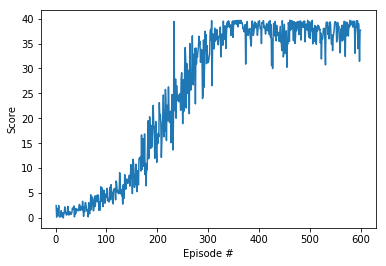

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

When finished, you can close the environment.

In [12]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 